### Business Case :
        Based on the features we have to predict person have heart desease or not

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
# loading data
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

### Domain Analysis

 - Age: represent the age of the patient in years. It's important for analyzing risk factors associated with heart disease, as age is a significant risk factor.

- Sex:  indicating the gender of the patient. Gender differences can influence the prevalence and severity of heart disease.

- ChestPainType: represent the type of chest pain experienced by the patient, often with categories like typical angina(TA), atypical angina (ATA), non-anginal pain (NAP), and asymptomatic (ASY). This is crucial for diagnosing the type and severity of heart disease.

- RestingBP: A numerical variable indicating the resting blood pressure in mm Hg. High blood pressure is a key risk factor for cardiovascular diseases.

- Cholesterol: represent the serum cholesterol level in mg/dL. Elevated cholesterol levels are strongly associated with an increased risk of heart disease.

- FastingBS: indicat whether the patient's fasting blood sugar is greater than 120 mg/dL (1 for true, 0 for false). High fasting blood sugar is indicative of diabetes, which is a risk factor for heart disease.

- RestingECG:  represent the results of the resting electrocardiogram, often with categories like normal, ST-T wave abnormality, or left ventricular hypertrophy. Abnormal results can suggest heart conditions.

- MaxHR:  represent the maximum heart rate achieved during exercise. It helps assess the heart's response to physical stress and is used in diagnosing various heart conditions.

- ExerciseAngina:  indicating whether the patient experiences angina (chest pain) during exercise (1 for yes, 0 for no). Exercise-induced angina is a significant indicator of coronary artery disease.

- Oldpeak:  indicating the ST depression induced by exercise relative to rest. It reflects abnormalities in the heart's function during stress and is used to assess the severity of ischemia.

- ST_Slope:  representing the slope of the peak exercise ST segment. It can be upsloping, flat, or downsloping, with certain slopes being indicative of a higher risk of heart disease.

- HeartDisease:  indicating whether the patient has heart disease (1 for yes, 0 for no). This is the target variable for prediction and analysis, representing the presence or absence of heart disease.

### Exploratory Data Analysis 

In [7]:
df.head() # 1st 5 record

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.tail()  # last 5 record

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No null values in the data

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP , Cholesterol  has value 0 which is not possible(Person has no life) oldspek also conatin 0 and -ve value but it is possible

In [11]:
# univariate analysis
# categorical columns
cat_col = []
for col in df :
    if df[col].dtype == object :
        cat_col.append(col)

cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [12]:
cat_df = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

In [13]:
cat_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


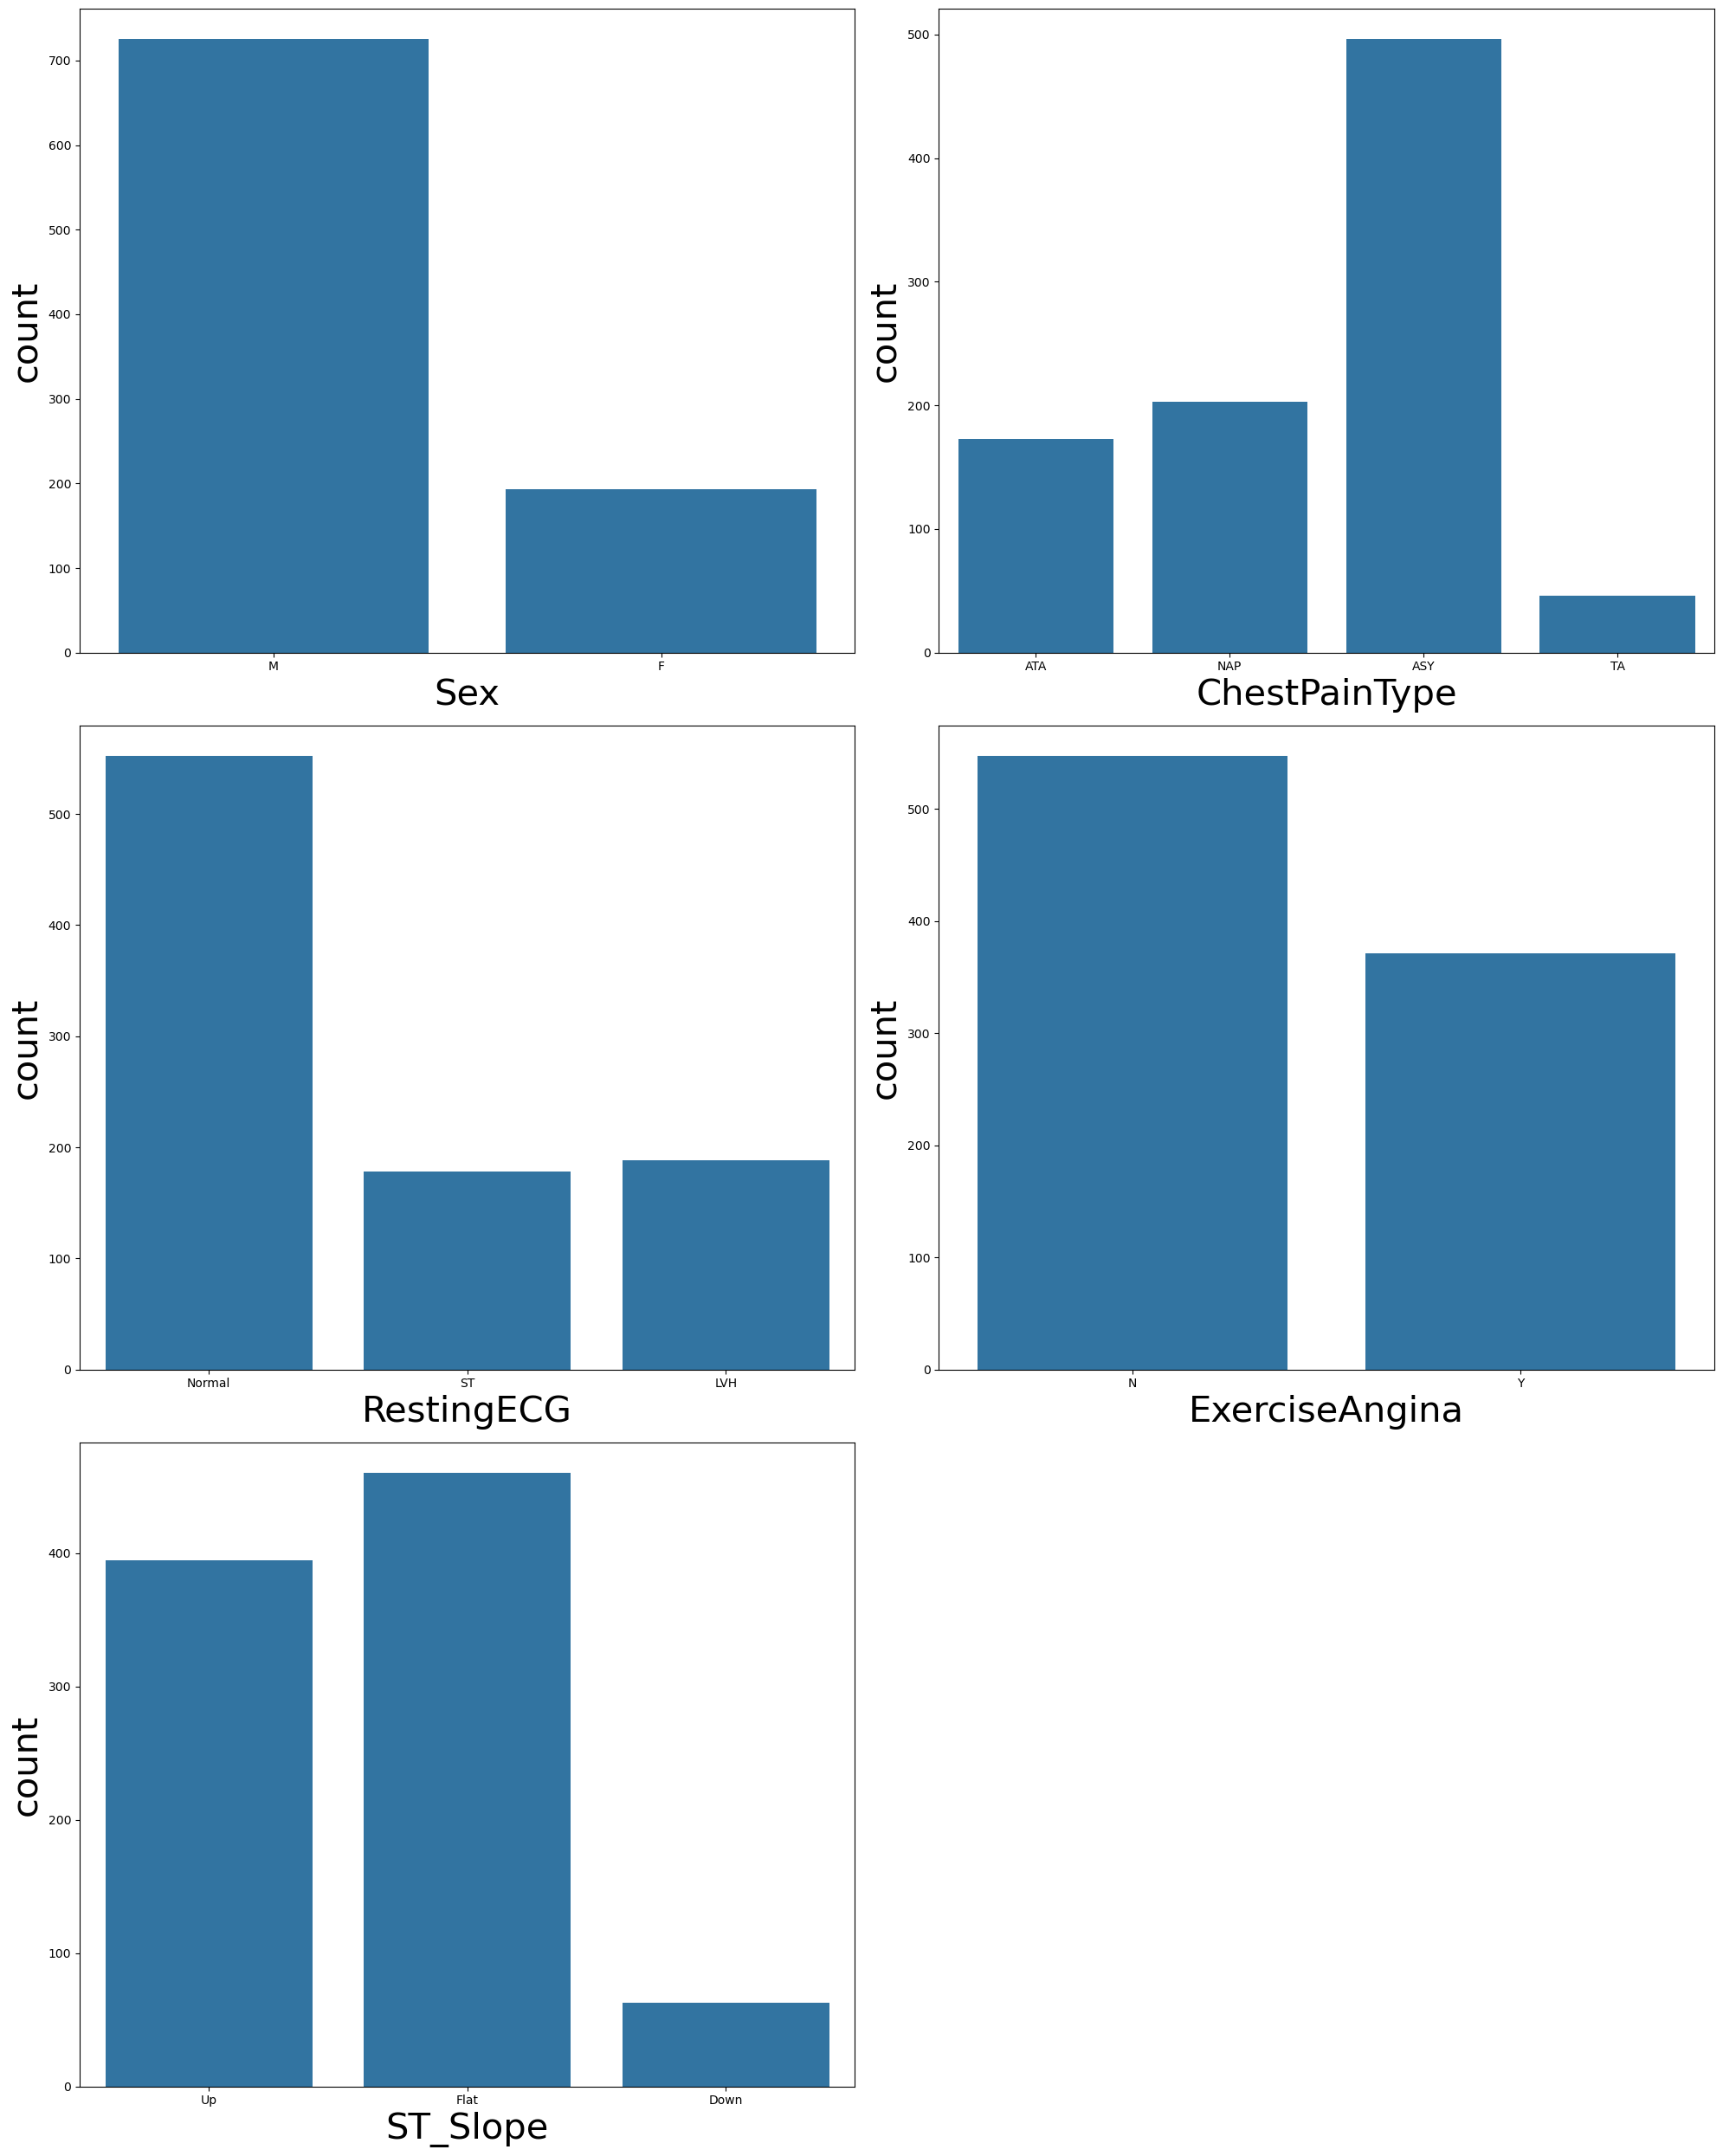

In [14]:
plt.figure(figsize=(20,25),facecolor = 'white')
pltno = 1
for col in cat_df :
    if pltno <= 6 :
        ax = plt.subplot(3,2,pltno)
        sns.countplot(x=cat_df[col])
        plt.xlabel(col,fontsize=30)
        plt.ylabel('count',fontsize=30)
    pltno += 1
plt.tight_layout()

- Sex : Count of male is high . 79 % are male and 21 % are female
- ChestPainType : 4 types of chestpain . 54 % are with type ASY , NAP with 22 %, ATA with 19 % and TA with 5 %
- RestingECG : 60 % persons have Normal RestingECG and Count of ST and LVH is same
- ExcerciseAngia : 60 % persons have no ExerciseAngia
- ST_Slope : 50 % persons with Flat ST_Slope . 43 % with Up and remaining with Down ST_Slope

In [15]:
# collecting descrete cols
des_col = []
for col in df :
    if df[col].dtype == 'int64' and len(df[col].unique()) < 10 :
        des_col.append(col)

des_col

['FastingBS', 'HeartDisease']

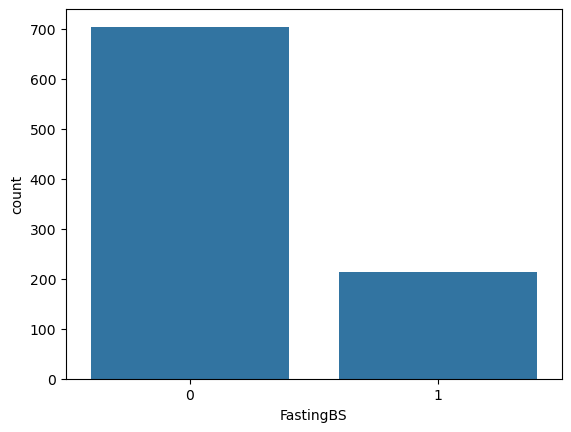

In [16]:
sns.countplot(x='FastingBS',data=df)
plt.show()

- FastingBS : 77 % persons have 0 fastingBS which means they have fasting blood sugar less than 120 mg/dL

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
con_col = []
for col in df :
    if df[col].dtype == 'int64' or df[col].dtype == 'float' and len(df[col].unique()) > 10 :
        con_col.append(col)

con_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [19]:
con_df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak']]

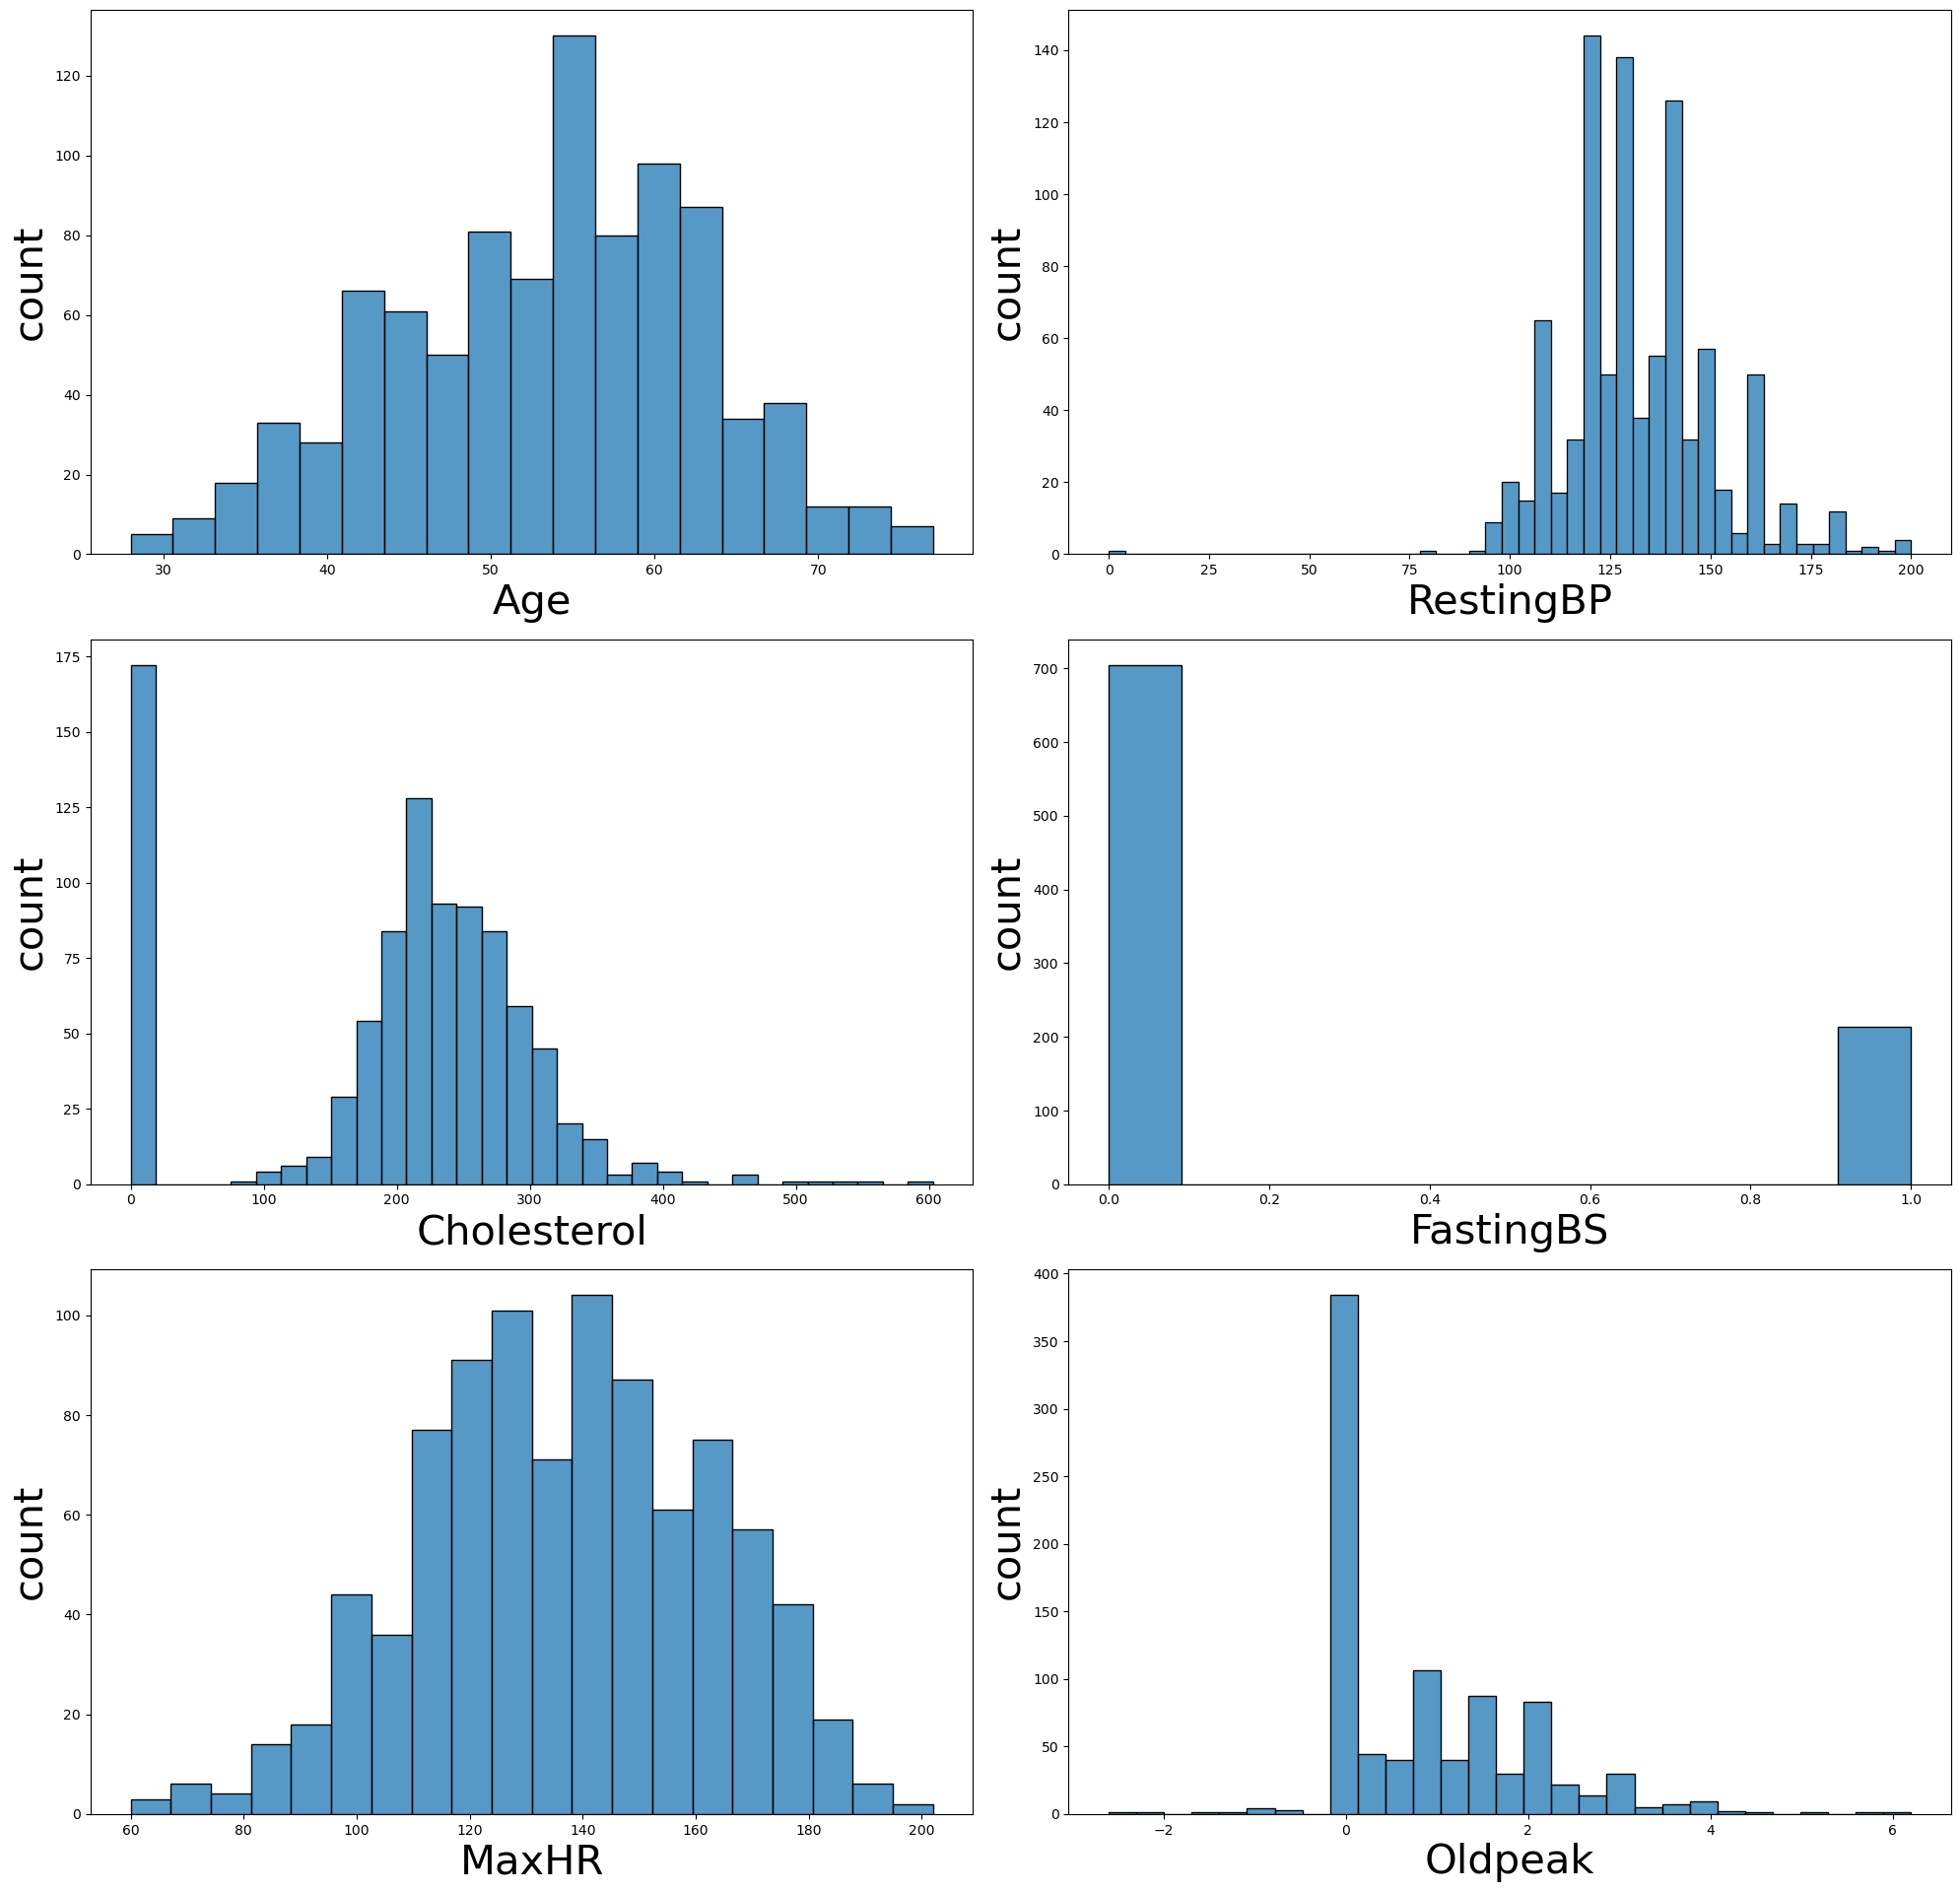

In [20]:
plt.figure(figsize=(20,25),facecolor = 'white')
pltno = 1
for col in con_df :
    if pltno <= 8 :
        ax = plt.subplot(4,2,pltno)
        sns.histplot(x=con_df[col])
        plt.xlabel(col,fontsize=30)
        plt.ylabel('count',fontsize=30)
    pltno += 1
plt.tight_layout()

- Age : Data is not normally distributed. Avg age is 53.5 . Only 5 % persons age with age of 37.
- RestingBP : Data is not normally distributed and it containe 0 values which means person have no life . Avg restingBP is 137
- Cholesterol : Data is skewed . It also contain 0 value  which means person have no life . Median is 223 and Highest cholesterol is 603
- MaxHR : Data is skewed . Median MaxHR is 137
- Oldpeak : Data is skewed . It also contain 0 values and negative values which is possible . max oldpeak is 6.20

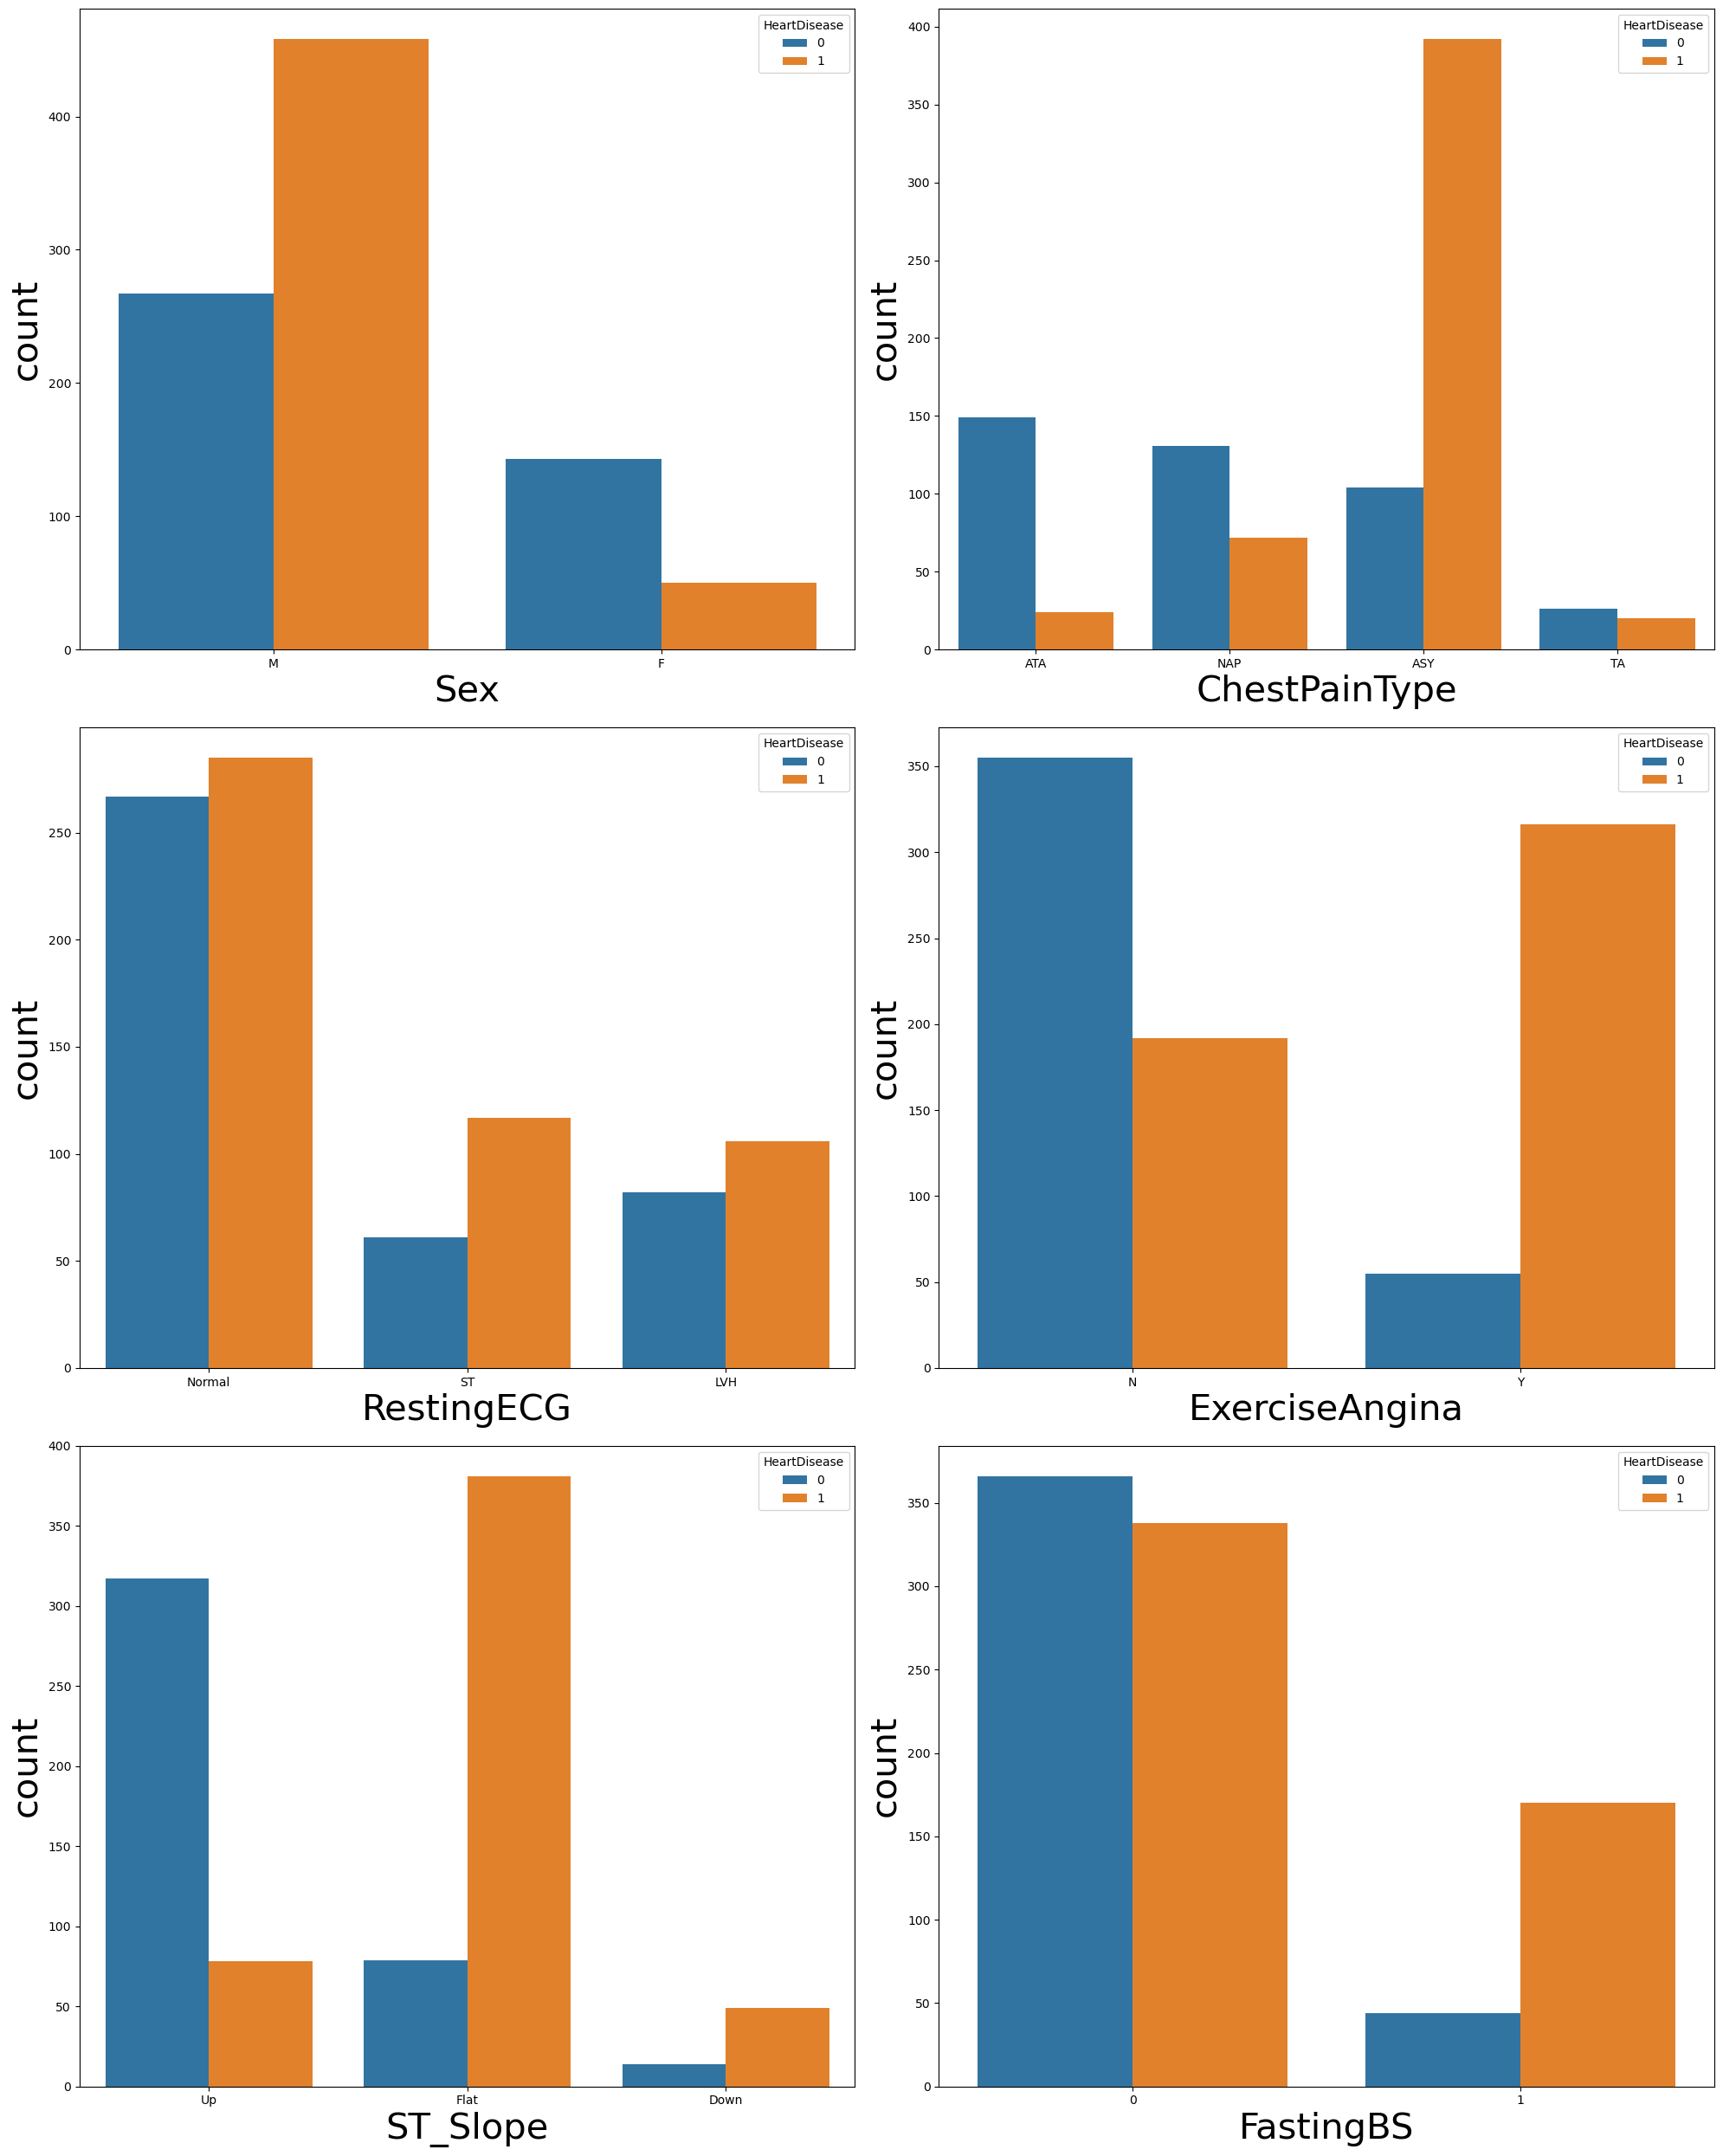

In [21]:
## Bivariate Analysis 
cat_df = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','FastingBS']]
plt.figure(figsize=(20,25),facecolor = 'white')
pltno = 1
for col in cat_df :
    if pltno <= 6 :
        ax = plt.subplot(3,2,pltno)
        sns.countplot(x=cat_df[col],hue=df.HeartDisease)
        plt.xlabel(col,fontsize=30)
        plt.ylabel('count',fontsize=30)
    pltno += 1
plt.tight_layout()

- Sex vs HeartDisease :  No relationship between sex and Disease

- ChestPainType vs HeartDisease : If ChestPain is type of ASY , TA then there is high chances of HeartDisease

- RestingECG vs HeartDisease : No direct Relationship
  
- ExcerciseAngia vs HeartDisease : If it is 1 i.e then person affected with heartdisease

- ST_Slope vs HeartDisease : if it is flat or Down then person with Disease

- FastingBS : if it is 1 (Fasting blood sugar > 120 mg/dL) then it is high chanses and if it is 0 then we may say that there is low chances


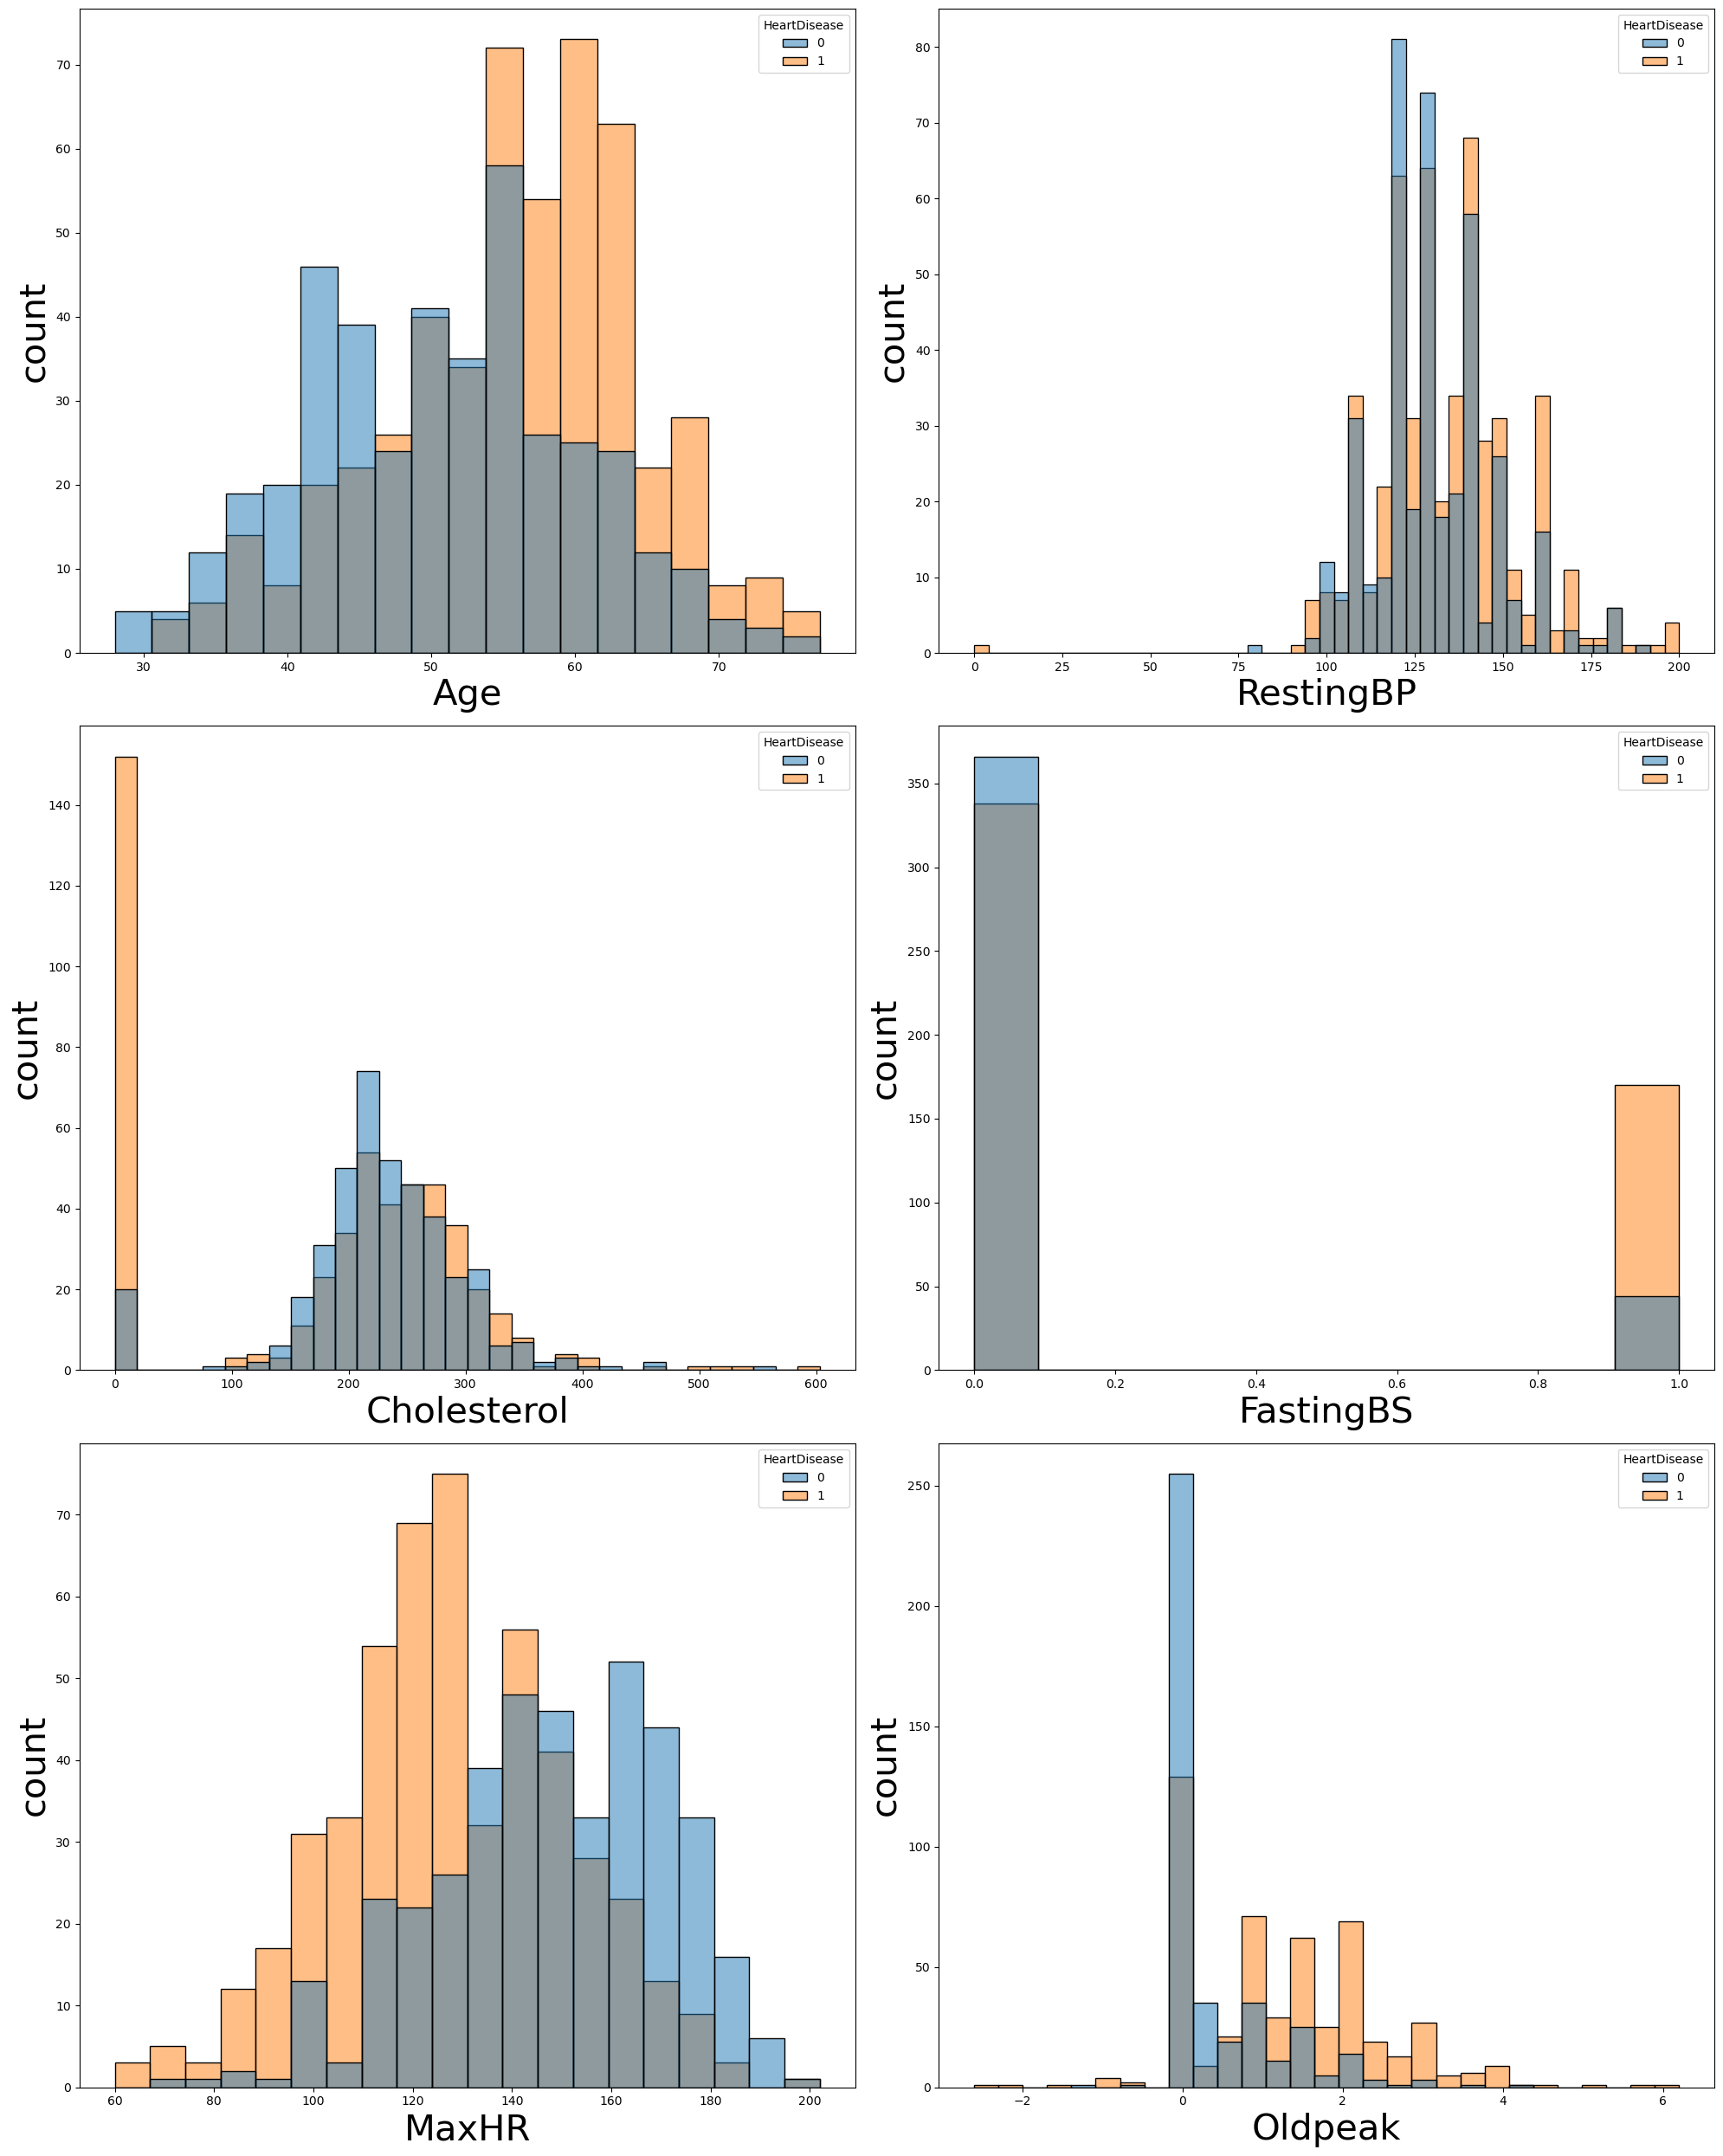

In [22]:
plt.figure(figsize=(20,25),facecolor = 'white')
pltno = 1
for col in con_df :
    if pltno <= 6 :
        ax = plt.subplot(3,2,pltno)
        sns.histplot(x=con_df[col],hue=df.HeartDisease)
        plt.xlabel(col,fontsize=30)
        plt.ylabel('count',fontsize=30)
    pltno += 1
plt.tight_layout()

- Age vs HeartDisease : if age > 52 then there is high chances of heartdisease

- RestingBP vs HeartDisease : no direct relationship

- Cholesterol vs HeartDisease : if it lies between 140 to 250 then there is low chances o.w. high

- MaxHR vs HeartDisease : if MaxHR is less than 130 then there is high chanses

- Oldpeak vs HeartDisease : if it is between 0 to 1.2 then it considred as normal i.e. low chance

### Data Preprocessing

In [23]:
# handling null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No null values in the data

In [24]:
# handling corrupted data
# cholesterol and Resting Bp contains null values
print(len(df[df['Cholesterol'] == 0]))
len(df[df['RestingBP'] == 0])

172


1

In [25]:
# replace with median
df['Cholesterol'].replace(0,df['Cholesterol'].median(),inplace=True)
df['RestingBP'].replace(0,df['RestingBP'].median(),inplace=True)

In [26]:
print(len(df[df['Cholesterol'] == 0]))
len(df[df['RestingBP'] == 0])

0


0

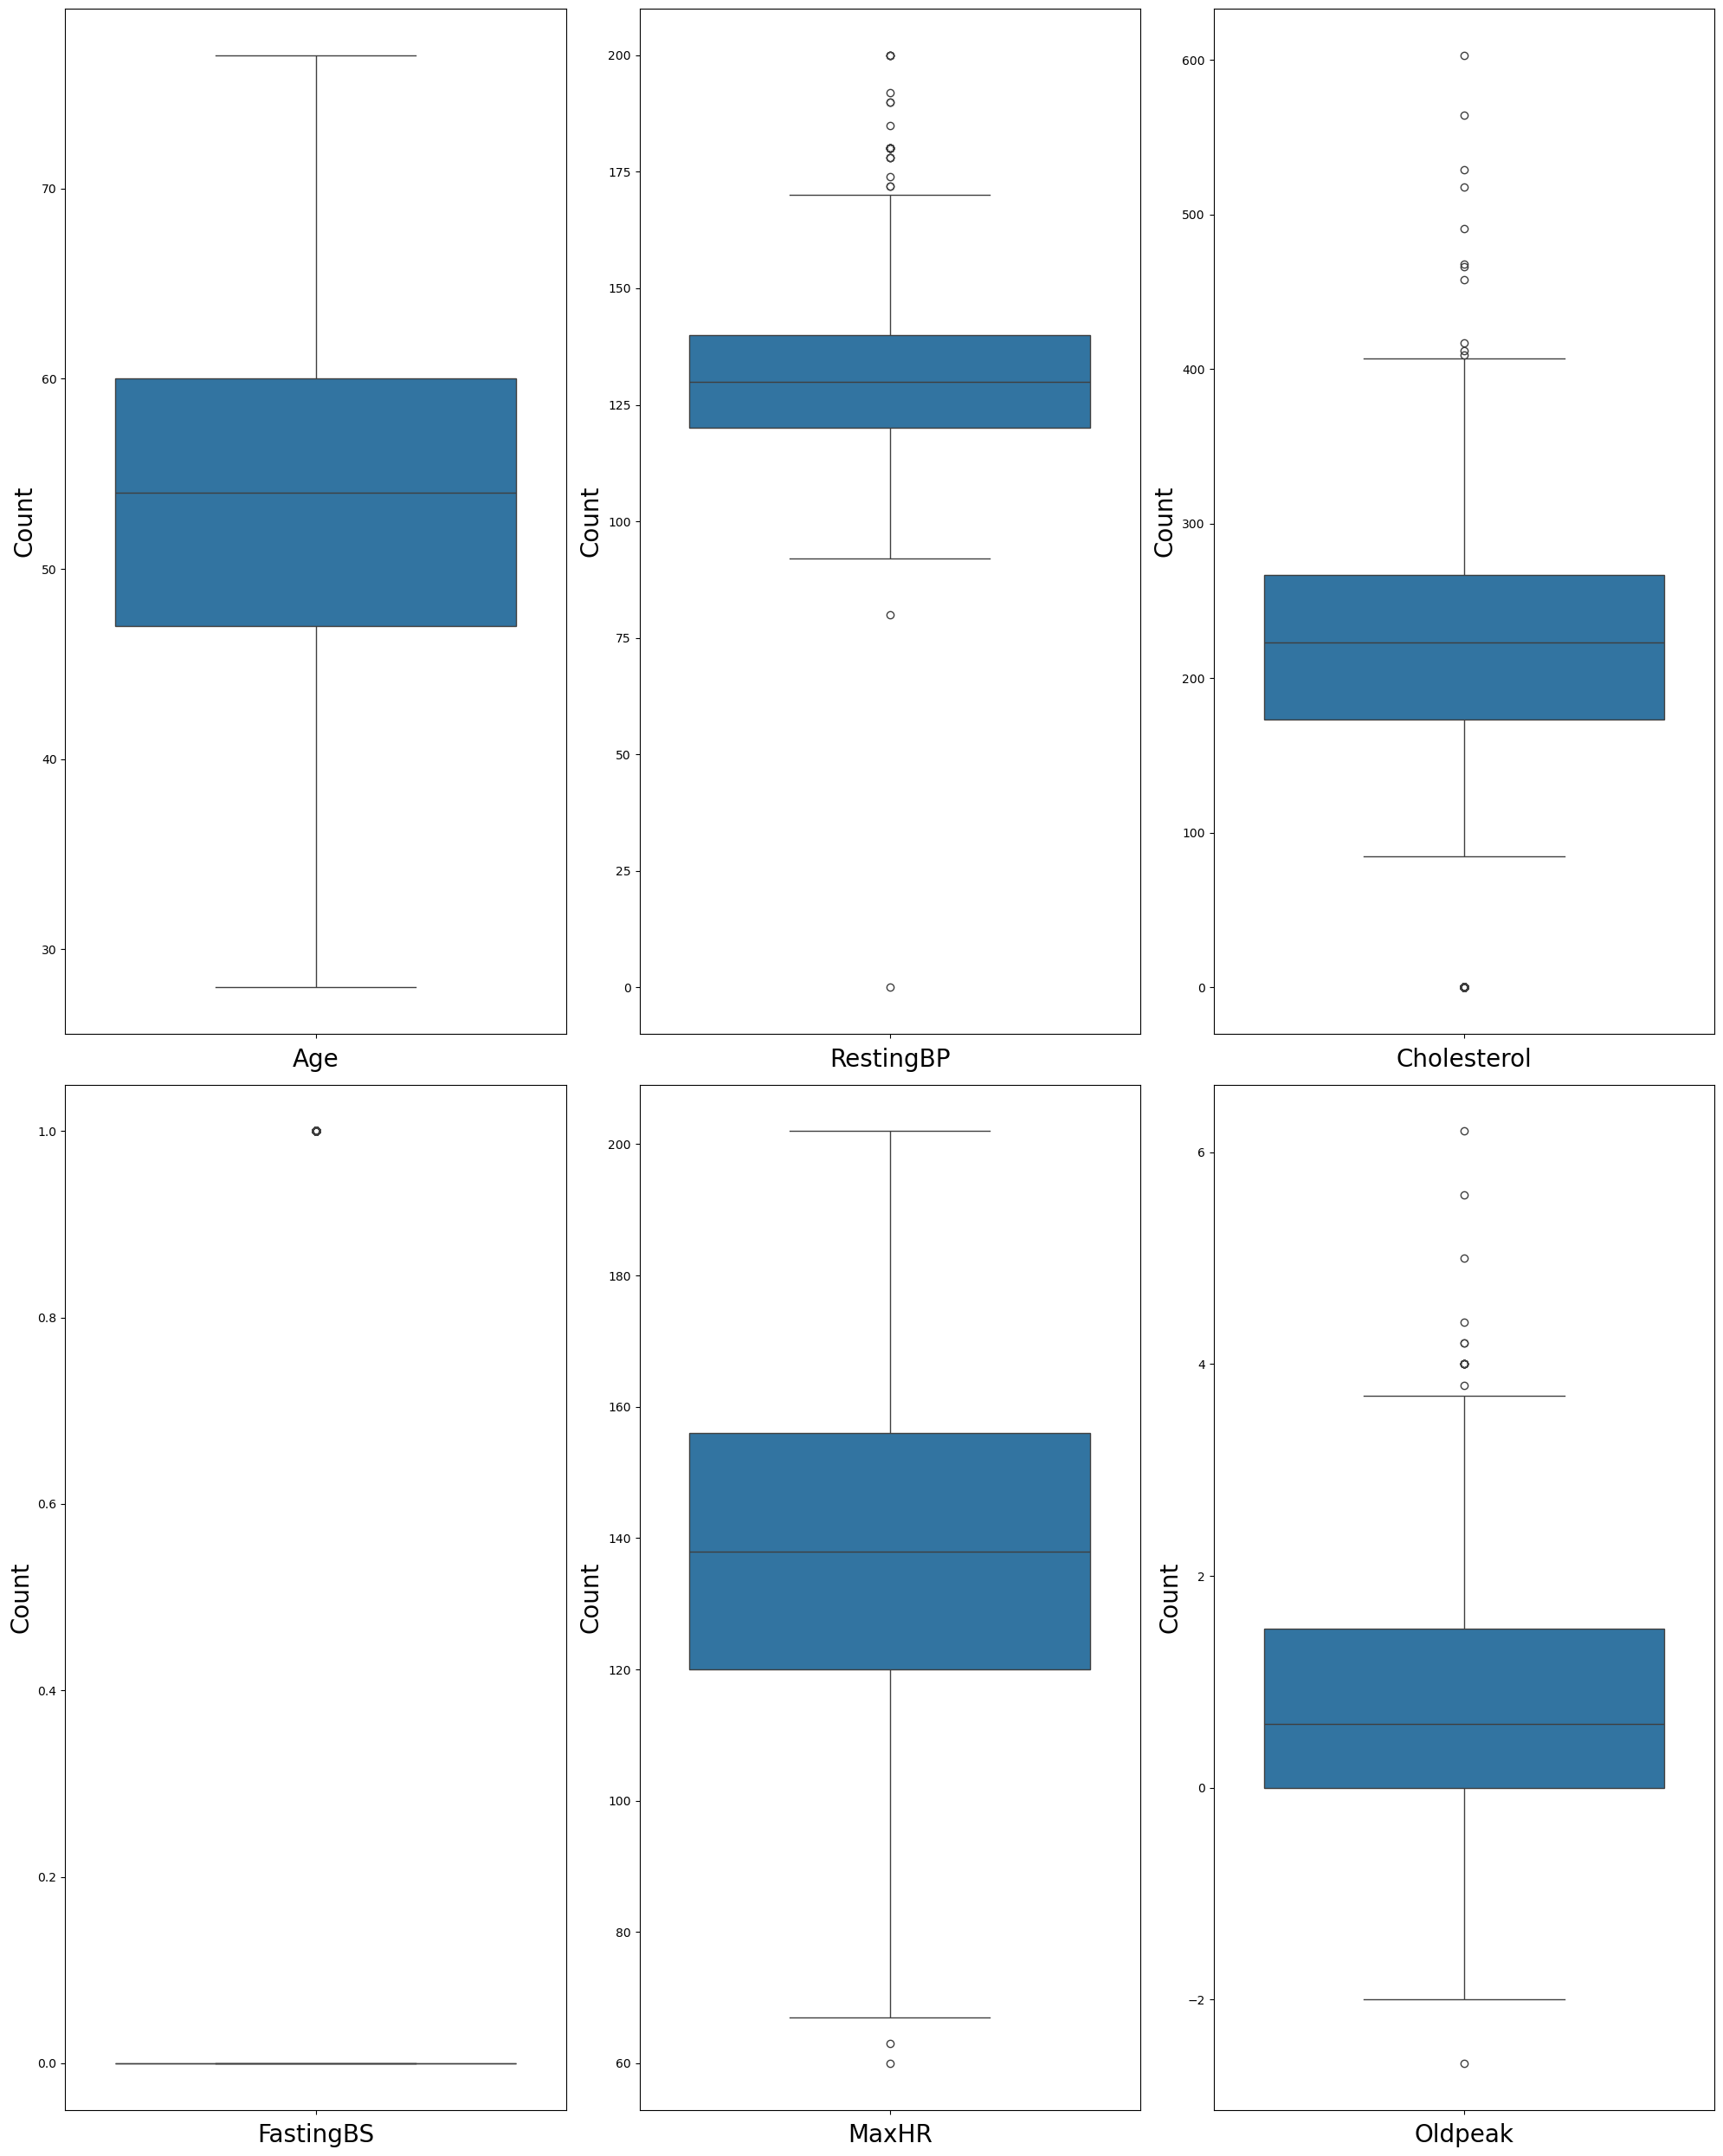

In [27]:
# checking outliers
plt.figure(figsize = (20,25) , facecolor = 'white')
pltno = 1
for col in con_df :
    if pltno <=8 :
        ax = plt.subplot(2,3,pltno)
        sns.boxplot(con_df[col])
        plt.xlabel(col,fontsize = 20)
        plt.ylabel('Count',fontsize = 20)
    pltno += 1
plt.tight_layout()

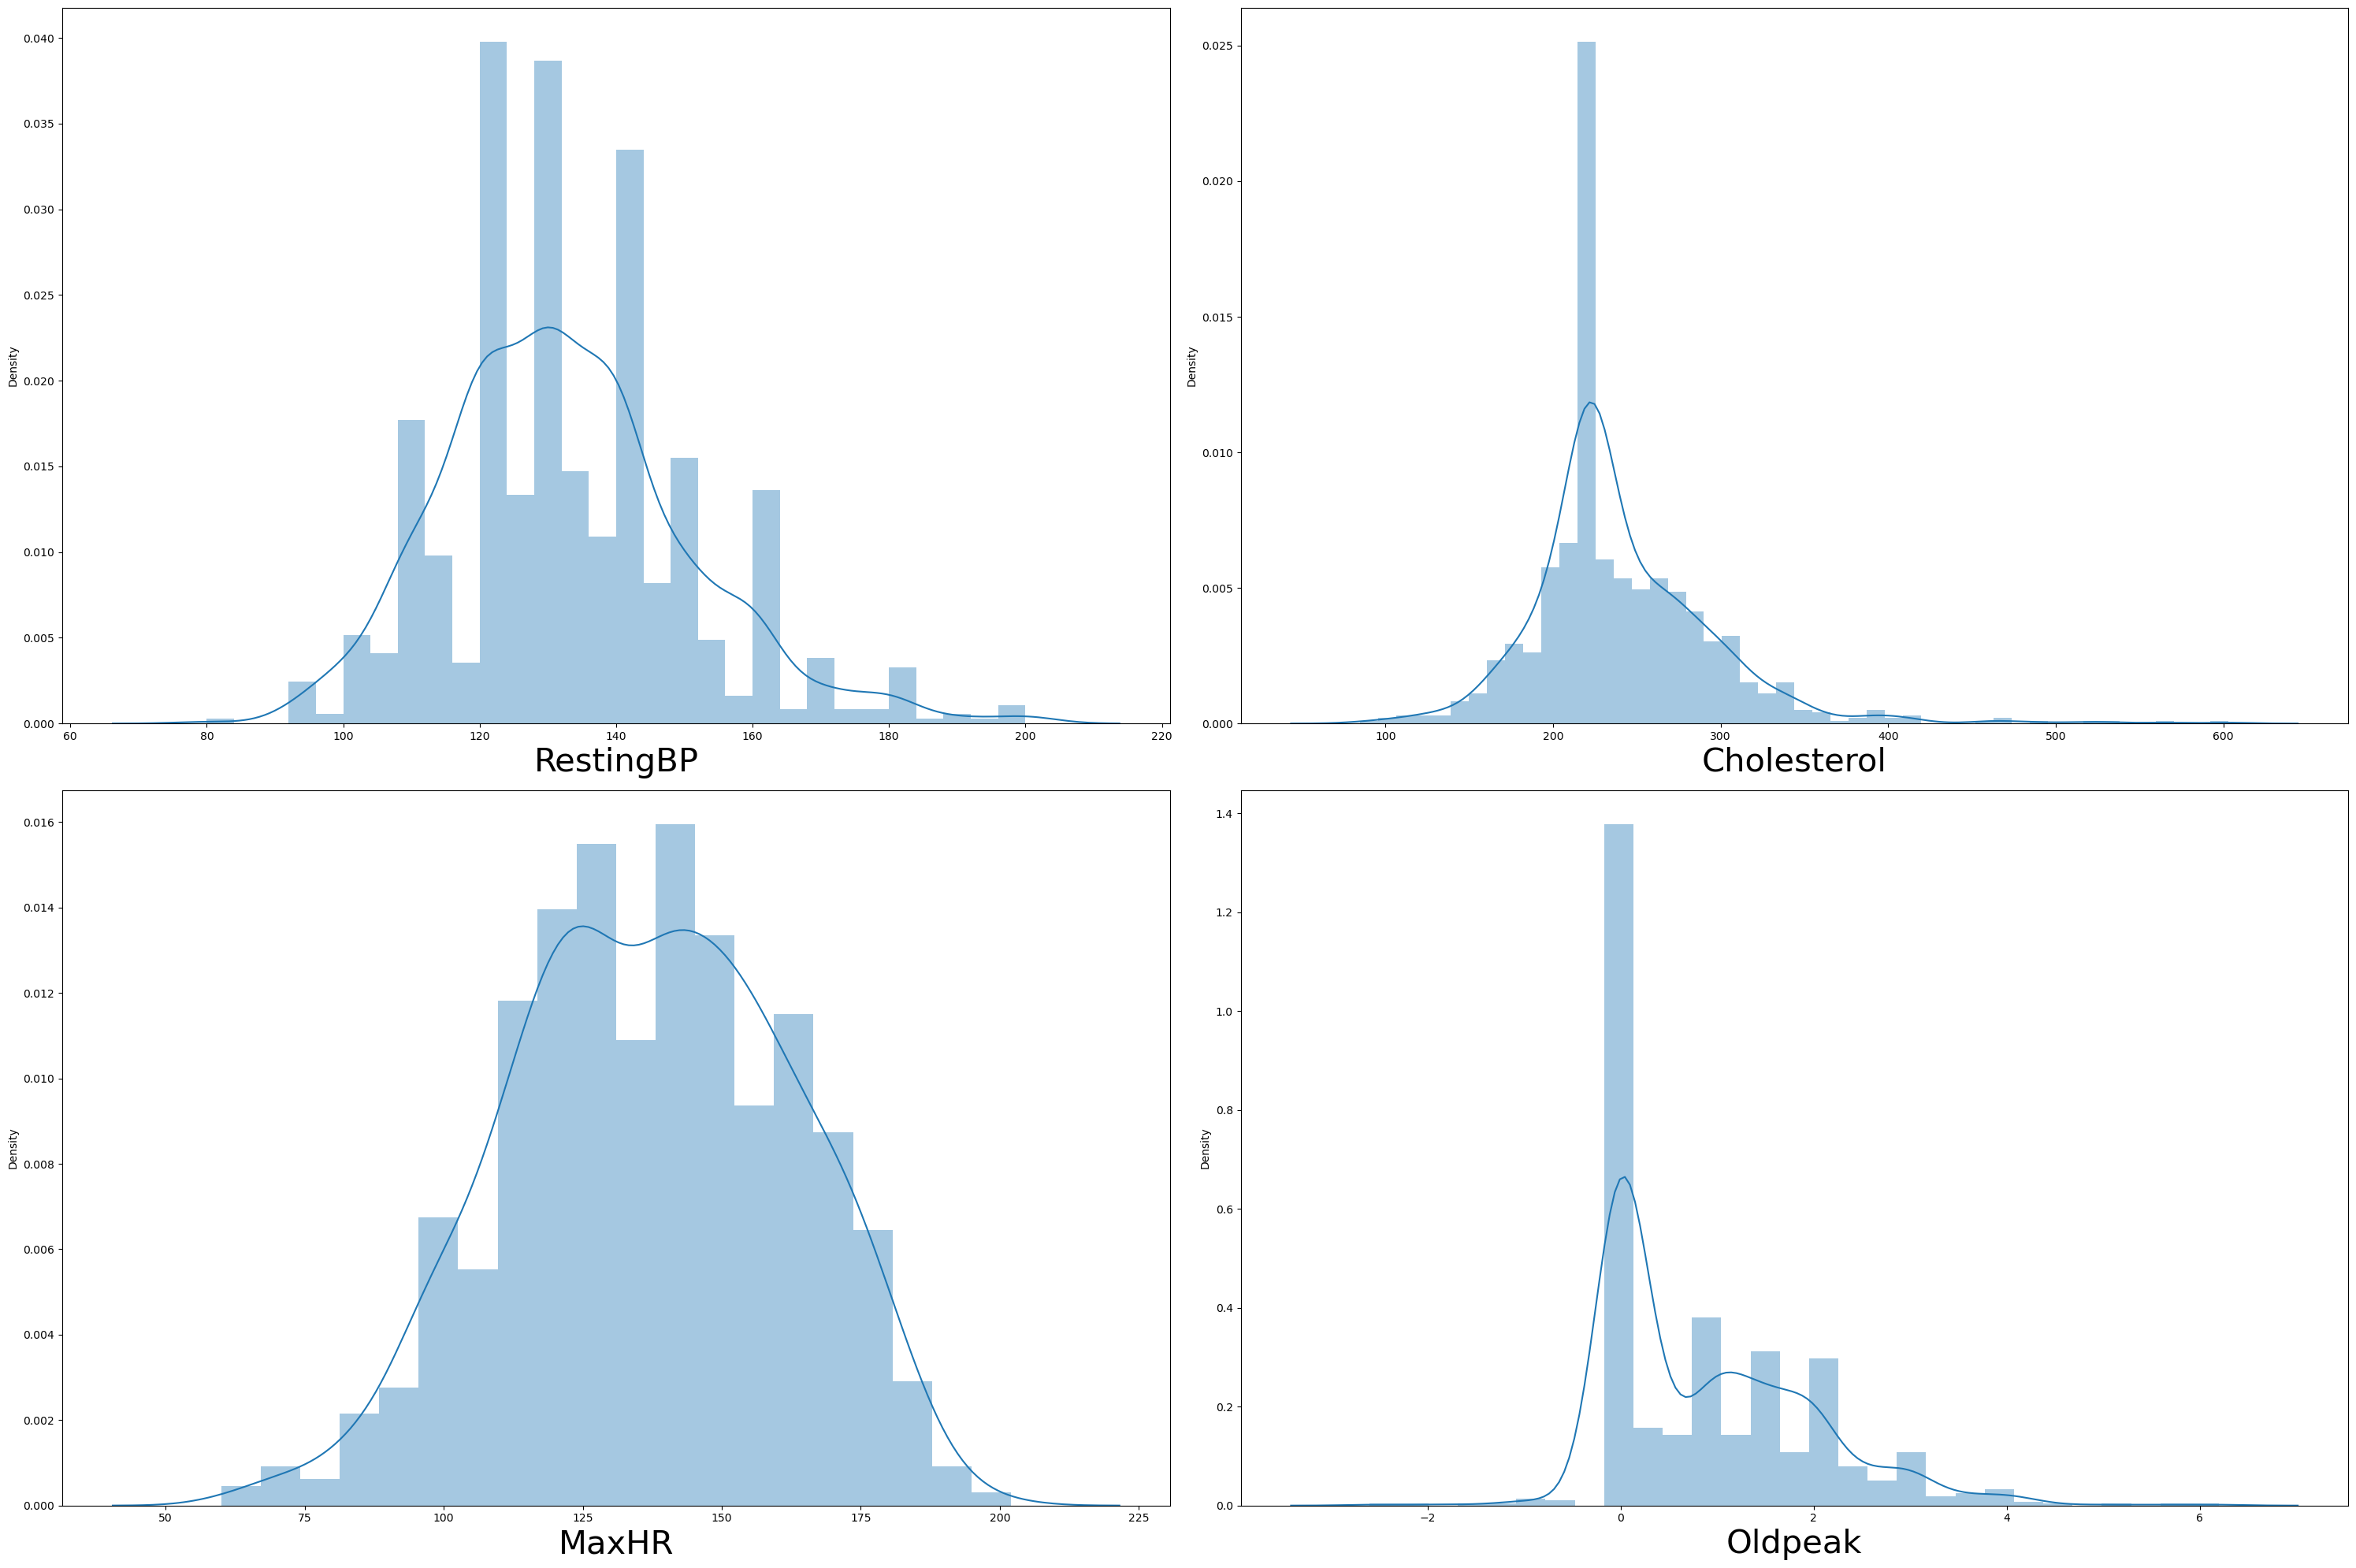

In [28]:
data = df[['RestingBP','Cholesterol','MaxHR','Oldpeak']]
plt.figure(figsize=(30,20),facecolor='white')

plotnumber=1

for column in data:
    if plotnumber<=4 :
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.tight_layout()    

In [29]:
# RestingBP
from scipy import stats
upper_limit = df.RestingBP.mean() + 3*df.RestingBP.std()
lower_limit=df.RestingBP.mean() - 3*df.RestingBP.std()
print(upper_limit)
lower_limit

186.50850769514767


78.56774502816387

In [30]:
df[df['RestingBP'] > upper_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,223,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,223,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [31]:
df[df['RestingBP'] < lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [32]:
df.loc[df['RestingBP'] > upper_limit,'RestingBP'] = df.RestingBP.median()

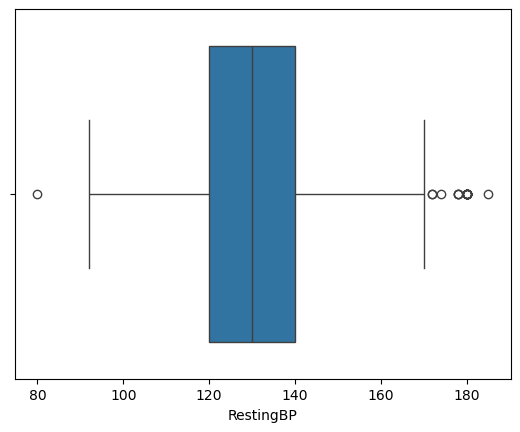

In [33]:
sns.boxplot(x='RestingBP',data=df)
plt.show()

In [34]:
df['RestingBP'] = np.sqrt(df['RestingBP'])

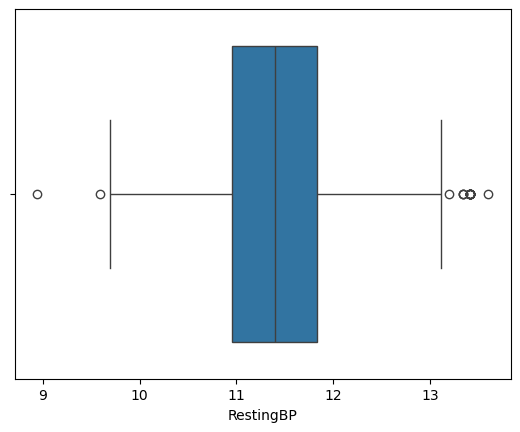

In [35]:
sns.boxplot(x='RestingBP',data=df)
plt.show()

In [36]:
## Cholesterol
upper_limit = df.Cholesterol.mean() + 3*df.Cholesterol.std()
lower_limit=df.Cholesterol.mean() - 3*df.Cholesterol.std()
print(upper_limit)
lower_limit

402.53059994321745


78.63279874959298

In [37]:
df[df['Cholesterol'] > upper_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,10.630146,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,12.041595,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,12.247449,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,10.862780,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,10.954451,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,11.401754,603,1,Normal,125,Y,1.0,Flat,1
182,52,M,ASY,11.832160,404,0,Normal,124,Y,2.0,Flat,1
250,44,M,ASY,11.618950,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,11.489125,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,10.723805,564,0,LVH,160,N,1.6,Flat,0


In [38]:
df[df['Cholesterol'] < lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [39]:
# replacing with median
df.loc[df['Cholesterol'] > upper_limit, 'Cholesterol' ] = df['Cholesterol'].median()

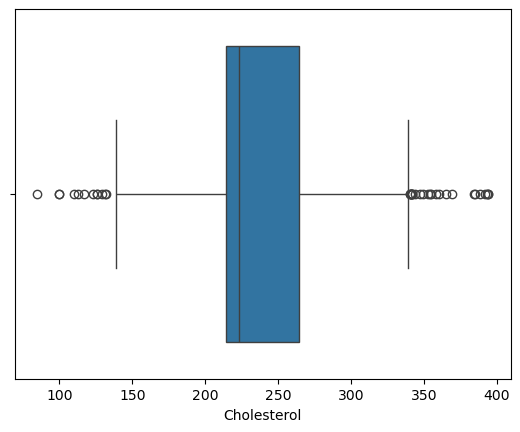

In [40]:
sns.boxplot(x='Cholesterol',data = df)
plt.show()

In [41]:
df['Cholesterol'] = np.sqrt(df['Cholesterol'])

<Axes: xlabel='Cholesterol'>

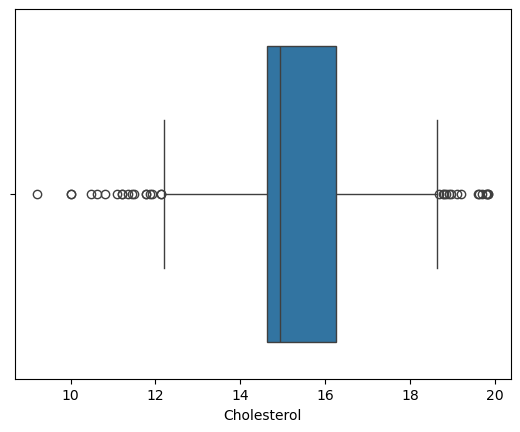

In [42]:
sns.boxplot(x='Cholesterol',data=df)

In [43]:
## MaxHR
upper_limit = df['MaxHR'].mean() + 3*df['MaxHR'].std()
lower_limit = df['MaxHR'].mean() - 3*df['MaxHR'].std()
print(upper_limit)
lower_limit

213.19037060647202


60.42836577697024

In [44]:
df[df['MaxHR'] > upper_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [45]:
df[df['MaxHR'] < lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,M,ASY,11.83216,14.933185,0,Normal,60,N,0.0,Flat,1


In [46]:
# replacing with median
df.loc[df['MaxHR'] < lower_limit ,'MaxHR'] = df['MaxHR'].median()

In [47]:
df[df['MaxHR'] < lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<Axes: xlabel='MaxHR'>

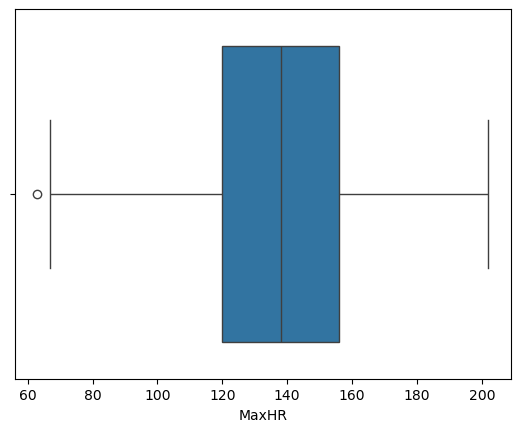

In [48]:
sns.boxplot(x='MaxHR',data=df)

In [49]:
df['MaxHR'] = np.sqrt(df['MaxHR'])

<Axes: xlabel='MaxHR'>

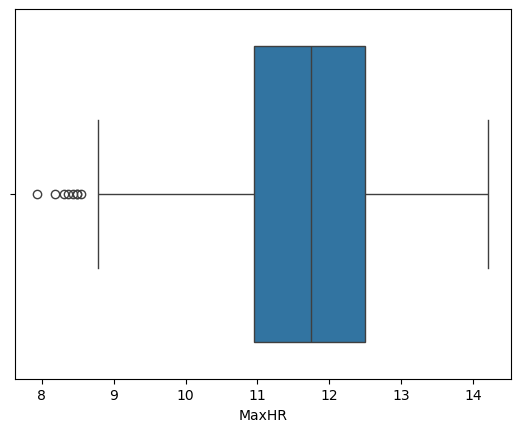

In [50]:
sns.boxplot(x='MaxHR',data=df)

In [51]:
# Oldpeak
upper_limit = df['Oldpeak'].mean() + 3 * df['Oldpeak'].std()
lower_limit = df['Oldpeak'].mean() - 3 * df['Oldpeak'].std()

In [52]:
df[df['Oldpeak'] > upper_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,11.832160,15.198684,0,ST,11.832160,Y,5.0,Flat,1
702,59,M,TA,13.341664,16.431677,0,LVH,12.041595,N,4.2,Down,0
771,55,M,ASY,11.832160,14.730920,0,Normal,10.535654,Y,5.6,Down,1
791,51,M,ASY,11.832160,17.262677,0,Normal,11.045361,Y,4.2,Flat,1
850,62,F,ASY,12.649111,12.806248,0,LVH,12.041595,N,6.2,Down,1
900,58,M,ASY,10.677078,17.832555,0,ST,11.832160,N,4.4,Down,1


In [53]:
df[df['Oldpeak'] < lower_limit]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,10.0,14.933185,1,ST,11.532563,N,-2.6,Flat,1


In [54]:
df.loc[df['Oldpeak'] > upper_limit,'Oldpeak'] = df['Oldpeak'].median()

In [55]:
df.loc[df['Oldpeak'] < lower_limit,'Oldpeak'] = df['Oldpeak'].median()

<Axes: xlabel='Oldpeak'>

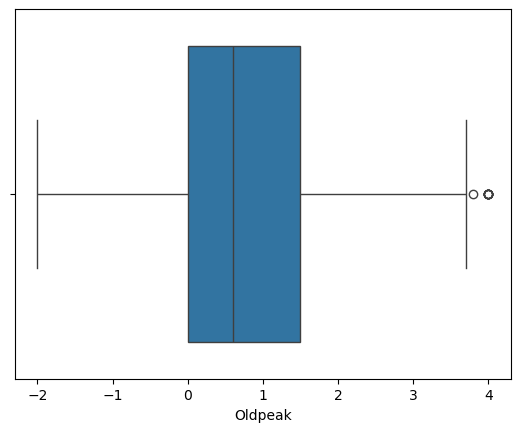

In [56]:
sns.boxplot(x='Oldpeak',data=df)

In [57]:
# df.Oldpeak = np.sqrt(df.Oldpeak)

<Axes: xlabel='Oldpeak'>

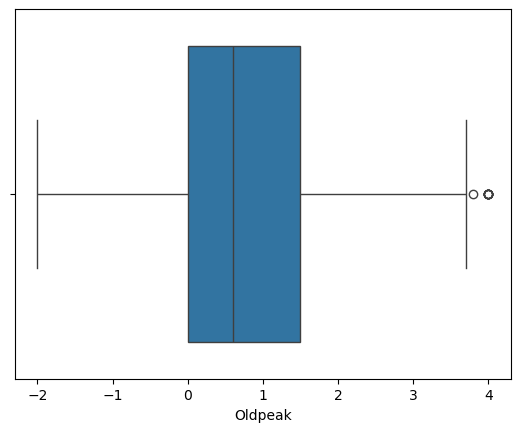

In [58]:
sns.boxplot(x='Oldpeak',data=df)

In [59]:
# encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [60]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [61]:
# label
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df.Sex = lc.fit_transform(df.Sex)

In [62]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

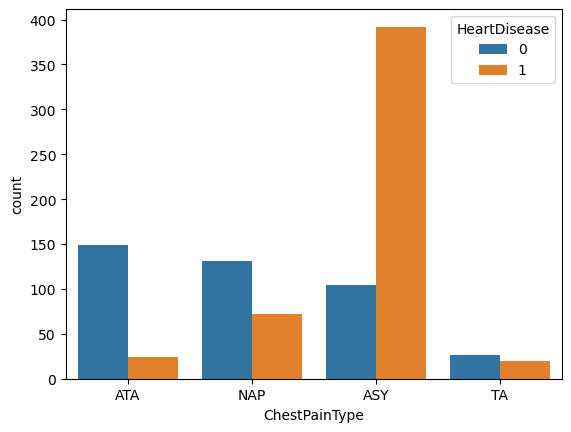

In [63]:
sns.countplot(x='ChestPainType',hue=df.HeartDisease,data=df)

In [64]:
# mapping
df.ChestPainType = df.ChestPainType.map({'ATA' : 0,'NAP' : 1,'TA' :2,'ASY':3})

In [65]:
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

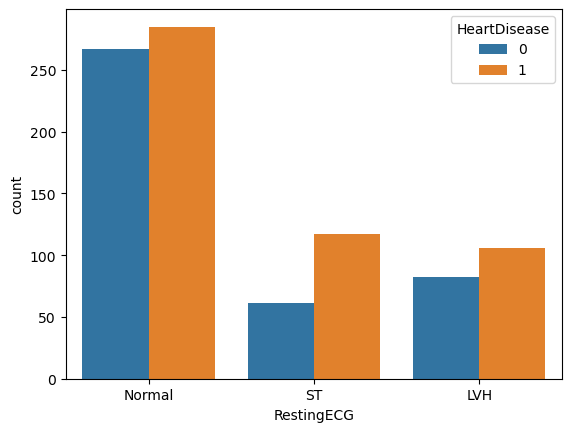

In [66]:
sns.countplot(x='RestingECG',hue=df.HeartDisease,data=df)

In [67]:
df.RestingECG = df.RestingECG.map({'Normal' : 0,'LVH' : 1,'ST' :2})

In [68]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

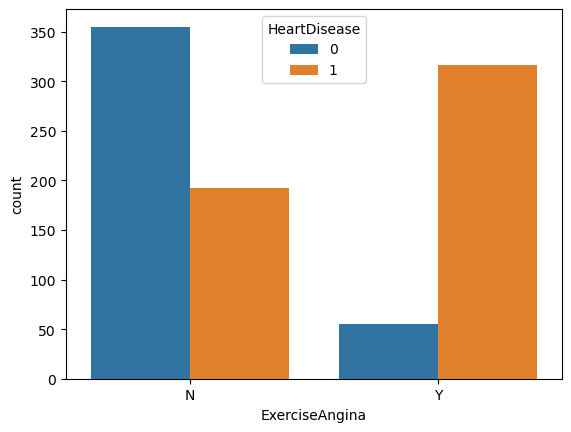

In [69]:
sns.countplot(x='ExerciseAngina',hue = df.HeartDisease,data=df)

In [70]:
df.ExerciseAngina = df.ExerciseAngina.map({'Y':1,'N':0})

In [71]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,11.832160,17.000000,0,0,13.114877,0,0.0,Up,0
1,49,0,1,12.649111,13.416408,0,0,12.489996,0,1.0,Flat,1
2,37,1,0,11.401754,16.822604,0,2,9.899495,0,0.0,Up,0
3,48,0,3,11.747340,14.628739,0,0,10.392305,1,1.5,Flat,1
4,54,1,1,12.247449,13.964240,0,0,11.045361,0,0.0,Up,0


In [72]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<Axes: xlabel='ST_Slope', ylabel='count'>

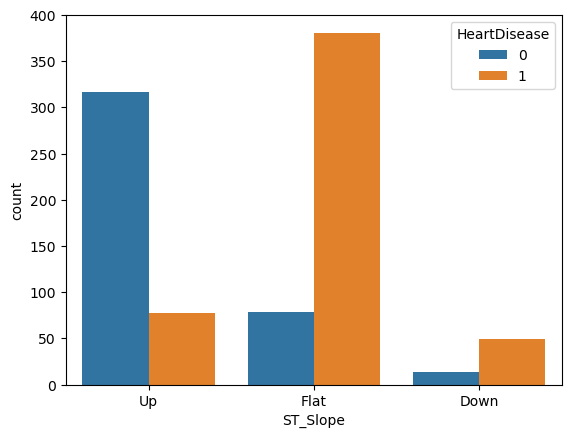

In [73]:
sns.countplot(x='ST_Slope',hue = df.HeartDisease,data=df)

In [74]:
df.ST_Slope = df.ST_Slope.map({'Up' : 0,'Down' : 1,'Flat' :2})

In [75]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,11.832160,17.000000,0,0,13.114877,0,0.0,0,0
1,49,0,1,12.649111,13.416408,0,0,12.489996,0,1.0,2,1
2,37,1,0,11.401754,16.822604,0,2,9.899495,0,0.0,0,0
3,48,0,3,11.747340,14.628739,0,0,10.392305,1,1.5,2,1
4,54,1,1,12.247449,13.964240,0,0,11.045361,0,0.0,0,0


In [76]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [77]:
# scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']] = \
sc.fit_transform(
    df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']])

In [78]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000
mean,-1.083616e-16,-7.740117e-18,-7.740117e-18,7.701416e-16,4.644070e-16,-3.096047e-17,7.740117e-17,3.405651e-16,-3.870058e-18,9.288140e-17,1.509323e-16,0.553377
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,0.497414
min,-2.706015e+00,-1.938163e+00,-1.579591e+00,-3.410055e+00,-4.124679e+00,-5.513413e-01,-7.470554e-01,-3.362712e+00,-8.235563e-01,-2.844962e+00,-1.112554e+00,0.000000
25%,-6.906294e-01,5.159524e-01,-7.663187e-01,-6.926207e-01,-4.703363e-01,-5.513413e-01,-7.470554e-01,-6.285225e-01,-8.235563e-01,-8.572344e-01,-1.112554e+00,0.000000
50%,5.188098e-02,5.159524e-01,8.602259e-01,-8.794002e-02,-2.646589e-01,-5.513413e-01,-7.470554e-01,8.999482e-02,-8.235563e-01,-2.609163e-01,9.654209e-01,1.000000
75%,6.883185e-01,5.159524e-01,8.602259e-01,4.938977e-01,6.236559e-01,-5.513413e-01,5.136006e-01,7.629909e-01,1.214246e+00,6.335610e-01,9.654209e-01,1.000000
max,2.491558e+00,5.159524e-01,8.602259e-01,2.885717e+00,3.056660e+00,1.813758e+00,1.774257e+00,2.324081e+00,1.214246e+00,3.118220e+00,9.654209e-01,1.000000


## Feature Selection

In [79]:
# checking correlation
con_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


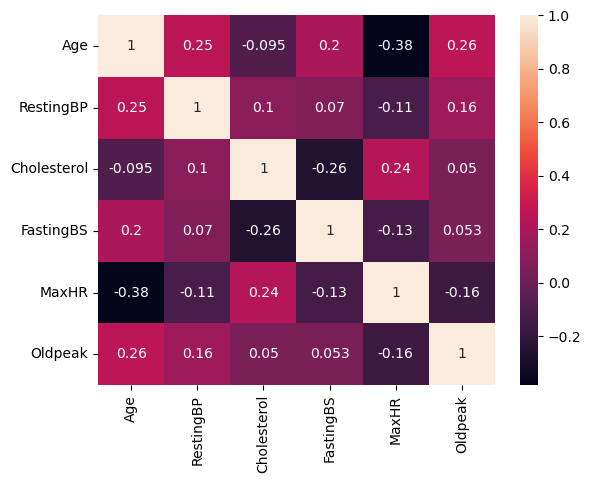

In [80]:
sns.heatmap(con_df.corr(),annot=True)
plt.show()

In [81]:
# no Correlaton Found

## Model Creation

In [82]:
x = df.drop(['HeartDisease'],axis=1)
y = df.HeartDisease

In [83]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,-1.579591,0.493898,1.131640,-0.551341,-0.747055,1.329259,-0.823556,-0.857234,-1.112554
1,-0.478484,-1.938163,-0.766319,1.598282,-1.289363,-0.551341,-0.747055,0.762991,-0.823556,0.136629,0.965421
2,-1.751359,0.515952,-1.579591,-0.087940,1.011795,-0.551341,1.774257,-1.584526,-0.823556,-0.857234,-1.112554
3,-0.584556,-1.938163,0.860226,0.379236,-0.470336,-0.551341,-0.747055,-1.137940,1.214246,0.633561,0.965421
4,0.051881,0.515952,-0.766319,1.055301,-0.919258,-0.551341,-0.747055,-0.546140,-0.823556,-0.857234,-1.112554


In [84]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [85]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [86]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [87]:
x_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [88]:
# balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [89]:
x_smote , y_smote = smote.fit_resample(x_train , y_train)

In [90]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 376, 0: 312})
SMOTE Classes Counter({1: 376, 0: 376})


In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_smote,y_smote)

LogisticRegression()

In [92]:
# model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report

In [93]:
y_pred = lr.predict(x_test)

In [94]:
confusion_matrix(y_test,y_pred)

array([[ 86,  12],
       [ 22, 110]], dtype=int64)

In [95]:
accuracy_score(y_test,y_pred)

0.8521739130434782

In [96]:
f1_score(y_test,y_pred)

0.8661417322834646

In [98]:
print('recall : ',recall_score(y_test,y_pred))
print('precision : ',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

recall :  0.8333333333333334
precision :  0.9016393442622951
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.90      0.83      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230



In [121]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,x,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.86597938 0.95049505 0.80434783 0.9        0.89090909 0.86206897
 0.91071429 0.86868687 0.75728155 0.7826087 ]
Cross validation Score: 0.8593091716912925
Std : 0.057502213221996334


In [105]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=3)
grid_search.fit(x_smote,y_smote)   

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ........................penalty=l2;, score=0.874 total time=   0.0s
[CV 2/5] END ........................penalty=l2;, score=0.874 total time=   0.0s
[CV 3/5] END ........................penalty=l2;, score=0.827 total time=   0.0s
[CV 4/5] END ........................penalty=l2;, score=0.853 total time=   0.0s
[CV 5/5] END ........................penalty=l2;, score=0.867 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.874 total time=   0.0s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy', verbose=3)

In [106]:
print(grid_search.best_params_)

{'penalty': 'l2'}


In [108]:
lr1 = LogisticRegression(penalty:'l2')

SyntaxError: invalid syntax (1226701250.py, line 1)

In [109]:
# knn
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20) :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_smote,y_smote)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [110]:
error_rate

[0.1391304347826087,
 0.20434782608695654,
 0.1565217391304348,
 0.1956521739130435,
 0.15217391304347827,
 0.16521739130434782,
 0.15217391304347827,
 0.1608695652173913,
 0.13043478260869565,
 0.1391304347826087,
 0.13478260869565217,
 0.1391304347826087,
 0.13478260869565217,
 0.1391304347826087,
 0.1391304347826087,
 0.13043478260869565,
 0.1391304347826087,
 0.12608695652173912,
 0.14782608695652175]

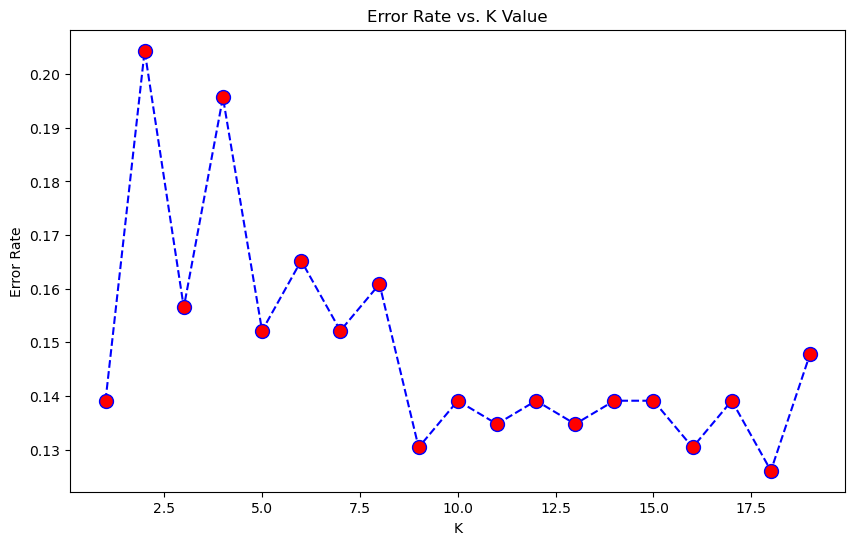

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [112]:
knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=9)

In [113]:
yk_pred = knn1.predict(x_test)

In [117]:
print('Accuracy : ',accuracy_score(y_test,yk_pred))
print('f1 :',f1_score(y_test,yk_pred))
print('recall :',recall_score(y_test,yk_pred))
print('precision :',precision_score(y_test,yk_pred))
print(classification_report(y_test,yk_pred))

Accuracy :  0.8695652173913043
f1 : 0.8809523809523809
recall : 0.8409090909090909
precision : 0.925
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        98
           1       0.93      0.84      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn1,x,y,cv=10,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.85869565 0.94565217 0.79347826 0.85869565 0.88043478 0.81521739
 0.90217391 0.81521739 0.8021978  0.78021978]
Cross validation Score: 0.8451982799808887
Std : 0.05048474132647704


In [127]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [128]:
ys_pred=svclassifier.predict(x_test)

In [129]:
print('Accuracy : ',accuracy_score(y_test,ys_pred))
print('f1 :',f1_score(y_test,ys_pred))
print('recall :',recall_score(y_test,ys_pred))
print('precision :',precision_score(y_test,ys_pred))
print(classification_report(y_test,ys_pred))

Accuracy :  0.8695652173913043
f1 : 0.8863636363636364
recall : 0.8863636363636364
precision : 0.8863636363636364
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        98
           1       0.89      0.89      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.91262136 0.95049505 0.80434783 0.91089109 0.90909091 0.84033613
 0.91071429 0.84313725 0.77358491 0.78723404]
Cross validation Score: 0.8642452856298626
Std : 0.05905974377423138


In [135]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV 1/5] END ....C=0.1, gamma=1, random_state=1;, score=0.713 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=1;, score=0.713 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=1;, score=0.713 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=1;, score=0.711 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=1;, score=0.711 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=2;, score=0.713 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=2;, score=0.713 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=2;, score=0.713 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=2;, score=0.711 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=2;, score=0.711 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=3;, score=0.713 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=3)

In [136]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001, 'random_state': 1}


In [137]:
clf=SVC(C=5, gamma=0.0001,random_state=1) ##0.1

In [138]:
clf.fit(x_smote, y_smote)

SVC(C=5, gamma=0.0001, random_state=1)

In [139]:
y_clf=clf.predict(x_test)

In [140]:
print('Accuracy : ',accuracy_score(y_test,y_clf))
print('f1 :',f1_score(y_test,y_clf))
print('recall :',recall_score(y_test,y_clf))
print('precision :',precision_score(y_test,y_clf))
print(classification_report(y_test,y_clf))

Accuracy :  0.8478260869565217
f1 : 0.8627450980392157
recall : 0.8333333333333334
precision : 0.8943089430894309
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.89      0.83      0.86       132

    accuracy                           0.85       230
   macro avg       0.84      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [141]:
scores_after = cross_val_score(clf,x,y,cv=10,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.87755102 0.95145631 0.84210526 0.92307692 0.9009009  0.84745763
 0.91071429 0.84313725 0.76470588 0.82105263]
Cross validation Score: 0.8682158099890274
Std : 0.05905974377423138


In [150]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
ydt_pred=dt.predict(x_test)#prediction
ydt_pred#predicted values 

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [151]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
259    0
490    1
302    1
7      0
892    0
Name: HeartDisease, Length: 230, dtype: int64

In [152]:
print('Accuracy : ',accuracy_score(y_test,ydt_pred))
print('f1 :',f1_score(y_test,ydt_pred))
print('recall :',recall_score(y_test,ydt_pred))
print('precision :',precision_score(y_test,ydt_pred))
print(classification_report(y_test,ydt_pred))

Accuracy :  0.782608695652174
f1 : 0.7950819672131147
recall : 0.7348484848484849
precision : 0.8660714285714286
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        98
           1       0.87      0.73      0.80       132

    accuracy                           0.78       230
   macro avg       0.78      0.79      0.78       230
weighted avg       0.80      0.78      0.78       230



In [ ]:
# hyper parameter

In [153]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [154]:
tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


In [155]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [156]:
tree_cv.best_score_#getting best score form cv

0.872934902290158

In [157]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf= 3,min_samples_split=2,splitter='random')#passing best parameter to decision tree

In [158]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, splitter='random')

In [159]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [160]:
print('Accuracy : ',accuracy_score(y_test,y_hat1))
print('f1 :',f1_score(y_test,y_hat1))
print('recall :',recall_score(y_test,y_hat1))
print('precision :',precision_score(y_test,y_hat1))
print(classification_report(y_test,y_hat1))

Accuracy :  0.8260869565217391
f1 : 0.8387096774193549
recall : 0.7878787878787878
precision : 0.896551724137931
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        98
           1       0.90      0.79      0.84       132

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



In [161]:
# random forest

from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)#training the data

RandomForestClassifier()

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
RandomForestClassifier()

RandomForestClassifier()

In [164]:
y_predict=rf_clf.predict(x_test)#testing

In [165]:
print('Accuracy : ',accuracy_score(y_test,y_predict))
print('f1 :',f1_score(y_test,y_predict))
print('recall :',recall_score(y_test,y_predict))
print('precision :',precision_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy :  0.8695652173913043
f1 : 0.8837209302325582
recall : 0.8636363636363636
precision : 0.9047619047619048
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [166]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False] #sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


In [168]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, 
                                 min_samples_leaf= 4, max_features= 'sqrt', 
                                 max_depth= 10, bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training 
y_predict=rf_clf2.predict(x_test)#testing
x=f1_score(y_test,y_predict)#checking performance

In [169]:
x

0.8803088803088803